In [2]:
import numpy as np
import torch

(10000, 3)


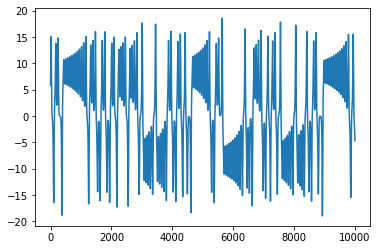

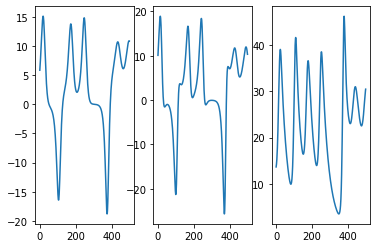

In [3]:
from scipy.integrate import solve_ivp

def Lorenz_63(S,t,sigma,rho,beta):
    """ Lorenz-96 dynamical model. """
    x_1 = sigma*(S[1]-S[0]);
    x_2 = S[0]*(rho-S[2])-S[1];
    x_3 = S[0]*S[1] - beta*S[2];
    dS  = np.array([x_1,x_2,x_3]);
    return dS

dt_int  = 0.01
len_int = 10000
sigma   = 10.0
rho     = 28.0
beta    = 8.0/3

x0 = np.array([8.0,0.0,30.0])
S = solve_ivp(fun=lambda t,y: Lorenz_63(y, t, sigma, rho, beta), 
              t_span=[0.,5+0.000001], y0=x0, first_step=dt_int, t_eval=np.arange(0, 5+0.000001, dt_int), method='RK45')

x0 = S.y[:,-1]
tt = np.arange(dt_int, len_int*dt_int+0.000001, dt_int)
S = solve_ivp(fun=lambda t,y: Lorenz_63(y, t, sigma, rho, beta), 
              t_span=[dt_int, len_int*dt_int+0.000001], y0=x0, first_step=dt_int, t_eval=tt, method='RK45')
S = S.y.transpose()

import matplotlib.pyplot as plt 

print(S.shape)
plt.figure(1)
plt.plot(S[:10000, 0])

plt.figure(2)
for jj in range(0,3):
   plt.subplot(131+jj)
   plt.plot(S[0:500,jj])

In [5]:
from sklearn.feature_extraction import image

ratio    = 8
sigNoise = 1.414

# extract subsequences
dataTestNoNaN      = image.extract_patches_2d(S, (200, 3), 2000)

dataTest         = np.zeros((dataTestNoNaN.shape))
dataTest[:]      = float('nan')

dataTest[:, ::ratio, 0:1] = dataTestNoNaN[:, ::ratio, 0:1]

dataTest[:,0:10,:] =  float('nan')
dataTest[:,-10:,:] =  float('nan')
    
maskTest  = ( dataTest     ==  dataTest    ).astype('float')

dataTest  = np.nan_to_num(dataTest)

dataTest      = np.moveaxis(dataTest,-1,1)
maskTest      = np.moveaxis(maskTest,-1,1)
dataTestNoNaN = np.moveaxis(dataTestNoNaN,-1,1)

X_test          = dataTestNoNaN
X_test_missing  = dataTest
mask_test       = maskTest

## normalized data
meanTr          = 1.1157348
stdTr           = 7.973943695

x_test_missing  = (X_test_missing - meanTr) / stdTr
x_test   = (X_test - meanTr) / stdTr
X_test_obs   = X_test_missing   + sigNoise * maskTest * np.random.randn(X_test_missing.shape[0], X_test_missing.shape[1], X_test_missing.shape[2])

x_test_obs   = (X_test_obs - meanTr) / stdTr

/software/python/virtualenv/py3.6-gpu/lib/python3.6/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass max_patches=2000 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


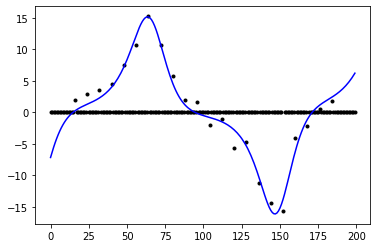

In [6]:
import matplotlib.pyplot as plt 
idx = 12
jj = 0
# Visualisation
plt.plot(X_test_obs[idx,jj,:], 'k.')
plt.plot(X_test[idx,jj,:],'b-')

In [7]:
np.savez('testset_1', x_test_obs=x_test_obs, x_test=x_test, 
         mask_test=mask_test, std=stdTr, mean=meanTr)